***Jeevika Chopra***

23169755

hi28lufu

***Bilal Ahmed***

23040780

**Importing Libraries and Dependecies**

In [ ]:
import sys
import importlib
sys.path.append('../')

from IPython.display import display, Math, Latex

# From data_preparation classes
from src.finance_ml.data_preparation.data_preparation import DataLoader

from src.finance_ml.indicators.indicators import Indicators
from src.finance_ml.clustering import Hierarchical
from src.finance_ml.distance_metrics import DistanceMetrics

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import pandas_ta as pta
import copy


**Loading Data with DataLoader**

In [334]:




# Defining time_index_col (must be the same column in all inputs) and keep_cols refering to the columns that will remain in the dataset
dataloader = DataLoader(time_index_col= 'DATE', keep_cols = ['VOLUME','OPEN', 'HIGHT', 'LOW', 'CLOSE', 'VW','TRANSACTIONS'])

In [335]:
fname_AAPL = 'equities/AAPL_2020-04-07_2022-04-06.parquet'
fname_FB = 'equities/FB_2020-04-07_2022-04-06.parquet'
fname_TSLA = 'equities/TSLA_2020-04-07_2022-04-06.parquet'

N=1000

**Preparing Stock- TSLA**

In [336]:
tsla_ticker = "TSLA"
# Load assets into a single DataFrame
tsla_df = dataloader.load_dataset({tsla_ticker: "../data/" + fname_TSLA}).iloc[:N]
display(tsla_df)


,TSLA_VOLUME,TSLA_OPEN,TSLA_HIGHT,TSLA_LOW,TSLA_CLOSE,TSLA_VW,TSLA_TRANSACTIONS
DATE,,,,,,,
2020-04-07 12:44:00,12730.0,107.8200,108.0220,107.800,108.0220,107.9410,62
2020-04-07 12:45:00,2660.0,108.1000,108.1000,108.100,108.1000,108.1064,32
2020-04-07 12:46:00,25895.0,108.1200,108.2000,108.060,108.1000,108.1376,79
2020-04-07 12:47:00,4750.0,108.0020,108.1600,108.000,108.1600,108.0972,42
2020-04-07 12:48:00,9385.0,108.1980,108.2000,108.152,108.2000,108.1773,56
...,...,...,...,...,...,...,...
2020-04-08 17:57:00,88805.0,108.5060,108.6380,108.498,108.5660,108.5807,294
2020-04-08 17:58:00,89670.0,108.6000,108.7289,108.551,108.6280,108.6664,306
2020-04-08 17:59:00,62745.0,108.6601,108.6601,108.502,108.6500,108.5931,291


In [337]:
# Essential columns in the dataset
data_cols = ["DATE", "OPEN", "HIGHT", "LOW", "CLOSE", "VW", "VOLUME"]

# Columns of indicators with default parameters
var_cols = [

    "RSI_w14",
    "ADI",
    "MFI_w14",
    "ADX_w14",
    "WMA_w09",
]

# For each of calculated column, we add the ticker code, as standardized by class 𝙳𝚊𝚝𝚊𝙻𝚘𝚊𝚍𝚎𝚛
var_cols = [tsla_ticker + "_" + col for col in var_cols]
norm_cols = [col + "_norm" for col in var_cols]

In [338]:
# Process data normalization
norm_data = True

trend_indicators_ind_list = [
    "RSI",  #relative strength index
    "ADI",  #Accumulation Distribution Index
    "ADX",  #Average Directional Index
    "WMA",  #Weighted Moving Average
    "MFI"   #Money Flow Index

]

# Select Indicator transformer
ind_processor = Indicators(
    ticker=tsla_ticker,
    norm_data=norm_data,
    calc_all=False,
    list_ind=trend_indicators_ind_list,
)

# Calculate Indicators over input dataframe
tsla_df = ind_processor.fit_transform(tsla_df)

if norm_data:
    df_norm = ind_processor.data_norm

In [339]:
# Display dataframe with Indicators
df_tsla=tsla_df[var_cols].dropna(axis=0)
display(tsla_df[var_cols].dropna(axis=0))

,TSLA_RSI_w14,TSLA_ADI,TSLA_MFI_w14,TSLA_ADX_w14,TSLA_WMA_w09
DATE,,,,,
2020-04-07 12:57:00,52.559589,5.405361e+04,40.446852,0.000000,108.058711
2020-04-07 12:58:00,37.062483,4.498694e+04,38.007330,0.000000,108.008489
2020-04-07 12:59:00,56.430771,6.378194e+04,42.153654,0.000000,108.038133
2020-04-07 13:01:00,41.556668,4.807194e+04,32.807838,0.000000,107.992178
2020-04-07 13:03:00,43.671641,5.410694e+04,32.628321,0.000000,107.964622
...,...,...,...,...,...
2020-04-08 17:57:00,35.388770,2.585135e+06,34.114587,36.216033,108.677680
2020-04-08 17:58:00,38.486864,2.573088e+06,43.651568,36.083246,108.657524
2020-04-08 17:59:00,39.593703,2.627816e+06,38.067364,36.180224,108.644276


In [340]:
type(df_tsla)

pandas.core.frame.DataFrame

In [341]:
df_tsla.head()

,TSLA_RSI_w14,TSLA_ADI,TSLA_MFI_w14,TSLA_ADX_w14,TSLA_WMA_w09
DATE,,,,,
2020-04-07 12:57:00,52.559589,54053.606272,40.446852,0.0,108.058711
2020-04-07 12:58:00,37.062483,44986.939605,38.007330,0.0,108.008489
2020-04-07 12:59:00,56.430771,63781.939605,42.153654,0.0,108.038133
2020-04-07 13:01:00,41.556668,48071.939605,32.807838,0.0,107.992178
2020-04-07 13:03:00,43.671641,54106.939605,32.628321,0.0,107.964622


**Preparing Stock- FB**

In [342]:
fb_ticker = 'FB'
# Load assets into a single DataFrame
fb_df = dataloader.load_dataset({fb_ticker: "../data/" + fname_FB}).iloc[:N]
display(fb_df)


,FB_VOLUME,FB_OPEN,FB_HIGHT,FB_LOW,FB_CLOSE,FB_VW,FB_TRANSACTIONS
DATE,,,,,,,
2020-04-07 15:41:00,49517.0,169.705,169.8200,169.5811,169.70,169.7005,450
2020-04-07 15:42:00,38624.0,169.670,169.8105,169.6200,169.74,169.7052,456
2020-04-07 15:43:00,24795.0,169.720,169.8050,169.5700,169.57,169.6920,348
2020-04-07 15:44:00,33196.0,169.550,169.5500,169.3900,169.41,169.4669,433
2020-04-07 15:45:00,67190.0,169.390,169.4800,168.9700,169.05,169.2253,650
...,...,...,...,...,...,...,...
2020-04-09 11:41:00,474.0,172.110,172.1100,172.0900,172.09,172.1170,11
2020-04-09 11:43:00,1018.0,172.290,172.2900,172.0300,172.05,172.2768,19
2020-04-09 11:44:00,200.0,172.260,172.2600,172.2600,172.26,172.2851,6


In [343]:
# Essential columns in the dataset
data_cols = ["DATE", "OPEN", "HIGHT", "LOW", "CLOSE", "VW", "VOLUME"]

# Columns of indicators with default parameters
var_cols = [


    "RSI_w14",
    "ADI",
    "MFI_w14",
    "ADX_w14",
    "WMA_w09",
]

# For each of calculated column, we add the ticker code, as standardized by class 𝙳𝚊𝚝𝚊𝙻𝚘𝚊𝚍𝚎𝚛
var_cols = [fb_ticker + "_" + col for col in var_cols]
norm_cols = [col + "_norm" for col in var_cols]

In [344]:
# Process data normalization
norm_data = True

trend_indicators_ind_list = [
    "RSI",  # Simple Moving Average
    "ADI",  # Weighted Moving Average
    "ADX",
    "WMA",
    "MFI"  # Exponential Moving Average

]

# Select Indicator transformer
ind_processor = Indicators(
    ticker=fb_ticker,
    norm_data=norm_data,
    calc_all=False,
    list_ind=trend_indicators_ind_list,
)

# Calculate Indicators over input dataframe
fb_df = ind_processor.fit_transform(fb_df)

if norm_data:
    df_norm = ind_processor.data_norm

In [345]:
# Display dataframe with Indicators
df_fb=fb_df[var_cols].dropna(axis=0)
display(fb_df[var_cols].dropna(axis=0))

,FB_RSI_w14,FB_ADI,FB_MFI_w14,FB_ADX_w14,FB_WMA_w09
DATE,,,,,
2020-04-07 15:54:00,37.810024,-1.218390e+05,49.160466,0.000000,169.279402
2020-04-07 15:55:00,34.216087,-1.167799e+05,46.117079,0.000000,169.230887
2020-04-07 15:56:00,50.320019,-8.697683e+04,46.269646,0.000000,169.263482
2020-04-07 15:57:00,51.461579,-1.090663e+05,55.023806,0.000000,169.304636
2020-04-07 15:58:00,48.491746,-1.078073e+05,55.474255,0.000000,169.323144
...,...,...,...,...,...
2020-04-09 11:41:00,30.016645,2.256356e+06,42.985712,24.769821,172.686000
2020-04-09 11:43:00,29.596163,2.255494e+06,45.992596,25.429421,172.499556
2020-04-09 11:44:00,34.762981,2.255494e+06,40.027784,26.041907,172.387333


In [346]:
fb_df = display(fb_df[var_cols].dropna(axis=0))


,FB_RSI_w14,FB_ADI,FB_MFI_w14,FB_ADX_w14,FB_WMA_w09
DATE,,,,,
2020-04-07 15:54:00,37.810024,-1.218390e+05,49.160466,0.000000,169.279402
2020-04-07 15:55:00,34.216087,-1.167799e+05,46.117079,0.000000,169.230887
2020-04-07 15:56:00,50.320019,-8.697683e+04,46.269646,0.000000,169.263482
2020-04-07 15:57:00,51.461579,-1.090663e+05,55.023806,0.000000,169.304636
2020-04-07 15:58:00,48.491746,-1.078073e+05,55.474255,0.000000,169.323144
...,...,...,...,...,...
2020-04-09 11:41:00,30.016645,2.256356e+06,42.985712,24.769821,172.686000
2020-04-09 11:43:00,29.596163,2.255494e+06,45.992596,25.429421,172.499556
2020-04-09 11:44:00,34.762981,2.255494e+06,40.027784,26.041907,172.387333


In [347]:
type(df_fb)

pandas.core.frame.DataFrame

In [348]:
df_fb.head()

,FB_RSI_w14,FB_ADI,FB_MFI_w14,FB_ADX_w14,FB_WMA_w09
DATE,,,,,
2020-04-07 15:54:00,37.810024,-121838.984244,49.160466,0.0,169.279402
2020-04-07 15:55:00,34.216087,-116779.909677,46.117079,0.0,169.230887
2020-04-07 15:56:00,50.320019,-86976.832754,46.269646,0.0,169.263482
2020-04-07 15:57:00,51.461579,-109066.256648,55.023806,0.0,169.304636
2020-04-07 15:58:00,48.491746,-107807.256648,55.474255,0.0,169.323144


**Preparing Stock- AAPL**

In [349]:
aapl_ticker = 'AAPL'
# Load assets into a single DataFrame
aapl_df = dataloader.load_dataset({aapl_ticker: "../data/" + fname_AAPL}).iloc[:N]
display(aapl_df)


,AAPL_VOLUME,AAPL_OPEN,AAPL_HIGHT,AAPL_LOW,AAPL_CLOSE,AAPL_VW,AAPL_TRANSACTIONS
DATE,,,,,,,
2020-04-07 12:17:00,14256.0,67.3500,67.3625,67.3275,67.3375,67.3454,45
2020-04-07 12:18:00,16552.0,67.3501,67.3625,67.3250,67.3250,67.3407,57
2020-04-07 12:19:00,80172.0,67.3250,67.4475,67.3250,67.4225,67.3937,149
2020-04-07 12:20:00,183740.0,67.4475,67.4700,67.3125,67.3700,67.3671,159
2020-04-07 12:21:00,35372.0,67.3500,67.3850,67.2975,67.2975,67.3469,102
...,...,...,...,...,...,...,...
2020-04-08 16:24:00,134412.0,66.3100,66.3125,66.2850,66.3000,66.2994,379
2020-04-08 16:25:00,260556.0,66.3037,66.3100,66.2550,66.2582,66.2861,525
2020-04-08 16:26:00,239724.0,66.2650,66.2950,66.2003,66.2075,66.2463,745


In [350]:
# Essential columns in the dataset
data_cols = ["DATE", "OPEN", "HIGHT", "LOW", "CLOSE", "VW", "VOLUME"]

# Columns of indicators with default parameters
var_cols = [

    "RSI_w14",
    "ADI",
    "MFI_w14",
    "ADX_w14",
    "WMA_w09",
]

# For each of calculated column, we add the ticker code, as standardized by class 𝙳𝚊𝚝𝚊𝙻𝚘𝚊𝚍𝚎𝚛
var_cols = [aapl_ticker + "_" + col for col in var_cols]
norm_cols = [col + "_norm" for col in var_cols]

In [351]:
# Process data normalization
norm_data = True

trend_indicators_ind_list = [
    "RSI",  # Simple Moving Average
    "ADI",  # Weighted Moving Average
    "ADX",  # 
    "WMA",  # Weighted Moving Average
    "MFI"  # Exponential Moving Average

]

# Select Indicator transformer
ind_processor = Indicators(
    ticker=aapl_ticker,
    norm_data=norm_data,
    calc_all=False,
    list_ind=trend_indicators_ind_list,
)

# Calculate Indicators over input dataframe
aapl_df = ind_processor.fit_transform(aapl_df)

if norm_data:
    df_norm = ind_processor.data_norm

In [352]:
# Display dataframe with Indicators
df_aapl=aapl_df[var_cols].dropna(axis=0)
display(aapl_df[var_cols].dropna(axis=0))

,AAPL_RSI_w14,AAPL_ADI,AAPL_MFI_w14,AAPL_ADX_w14,AAPL_WMA_w09
DATE,,,,,
2020-04-07 12:30:00,50.697650,-5.632518e+04,33.454103,0.000000,67.344082
2020-04-07 12:31:00,50.431936,-4.982718e+04,35.347259,0.000000,67.343487
2020-04-07 12:32:00,57.438634,-4.343918e+04,37.582448,0.000000,67.353113
2020-04-07 12:33:00,60.315365,-4.343918e+04,25.735041,0.000000,67.366629
2020-04-07 12:34:00,62.755285,-4.343918e+04,56.325522,0.000000,67.383533
...,...,...,...,...,...
2020-04-08 16:24:00,55.570698,-8.146729e+06,67.824258,13.450634,66.300029
2020-04-08 16:25:00,50.315875,-8.376965e+06,65.967700,12.643678,66.293362
2020-04-08 16:26:00,44.784236,-8.580237e+06,57.581793,12.577661,66.276291


In [353]:
aapl_df = display(aapl_df[var_cols].dropna(axis=0))

,AAPL_RSI_w14,AAPL_ADI,AAPL_MFI_w14,AAPL_ADX_w14,AAPL_WMA_w09
DATE,,,,,
2020-04-07 12:30:00,50.697650,-5.632518e+04,33.454103,0.000000,67.344082
2020-04-07 12:31:00,50.431936,-4.982718e+04,35.347259,0.000000,67.343487
2020-04-07 12:32:00,57.438634,-4.343918e+04,37.582448,0.000000,67.353113
2020-04-07 12:33:00,60.315365,-4.343918e+04,25.735041,0.000000,67.366629
2020-04-07 12:34:00,62.755285,-4.343918e+04,56.325522,0.000000,67.383533
...,...,...,...,...,...
2020-04-08 16:24:00,55.570698,-8.146729e+06,67.824258,13.450634,66.300029
2020-04-08 16:25:00,50.315875,-8.376965e+06,65.967700,12.643678,66.293362
2020-04-08 16:26:00,44.784236,-8.580237e+06,57.581793,12.577661,66.276291


In [354]:
type(df_aapl)

pandas.core.frame.DataFrame

In [355]:
df_aapl.head()

,AAPL_RSI_w14,AAPL_ADI,AAPL_MFI_w14,AAPL_ADX_w14,AAPL_WMA_w09
DATE,,,,,
2020-04-07 12:30:00,50.697650,-56325.184902,33.454103,0.0,67.344082
2020-04-07 12:31:00,50.431936,-49827.184902,35.347259,0.0,67.343487
2020-04-07 12:32:00,57.438634,-43439.184902,37.582448,0.0,67.353113
2020-04-07 12:33:00,60.315365,-43439.184902,25.735041,0.0,67.366629
2020-04-07 12:34:00,62.755285,-43439.184902,56.325522,0.0,67.383533


In [356]:
#clean_aapl_df = aapl_df.dropna(axis=0)
#clean_tsla_df = tsla_df.dropna(axis=0)
#clean_fb_df = fb_df.dropna(axis=0)

**Synchrinising Time Frames**

Processing Heads of AAPL

In [357]:
df_aapl_copy = df_aapl.copy()

In [358]:
df_aapl_copy = df_aapl_copy.reset_index(drop= False)

In [359]:
df_aapl_copy.head()

,DATE,AAPL_RSI_w14,AAPL_ADI,AAPL_MFI_w14,AAPL_ADX_w14,AAPL_WMA_w09
0,2020-04-07 12:30:00,50.697650,-56325.184902,33.454103,0.0,67.344082
1,2020-04-07 12:31:00,50.431936,-49827.184902,35.347259,0.0,67.343487
2,2020-04-07 12:32:00,57.438634,-43439.184902,37.582448,0.0,67.353113
3,2020-04-07 12:33:00,60.315365,-43439.184902,25.735041,0.0,67.366629
4,2020-04-07 12:34:00,62.755285,-43439.184902,56.325522,0.0,67.383533


In [360]:
df_aapl_copy['DATE'] = pd.to_datetime(df_aapl_copy['DATE'])

# Find the row where the value of "DATE" is equal to "2020-04-08 16:28:00"
desired_row = df_aapl_copy[df_aapl_copy['DATE'] == '2020-04-07 15:54:00']

#printing the desired row
desired_row

,DATE,AAPL_RSI_w14,AAPL_ADI,AAPL_MFI_w14,AAPL_ADX_w14,AAPL_WMA_w09
204,2020-04-07 15:54:00,44.43768,-9.926494e+06,32.698573,22.602358,66.432716


In [361]:
df_aapl_copy.head()

,DATE,AAPL_RSI_w14,AAPL_ADI,AAPL_MFI_w14,AAPL_ADX_w14,AAPL_WMA_w09
0,2020-04-07 12:30:00,50.697650,-56325.184902,33.454103,0.0,67.344082
1,2020-04-07 12:31:00,50.431936,-49827.184902,35.347259,0.0,67.343487
2,2020-04-07 12:32:00,57.438634,-43439.184902,37.582448,0.0,67.353113
3,2020-04-07 12:33:00,60.315365,-43439.184902,25.735041,0.0,67.366629
4,2020-04-07 12:34:00,62.755285,-43439.184902,56.325522,0.0,67.383533


In [362]:

# drop the top 327 rows.

df_aapl_copy = df_aapl_copy.iloc[204:].reset_index() # index of the desired row

# Display the first few rows of the updated dataframe to verify
df_aapl_copy.head()


,index,DATE,AAPL_RSI_w14,AAPL_ADI,AAPL_MFI_w14,AAPL_ADX_w14,AAPL_WMA_w09
0,204,2020-04-07 15:54:00,44.437680,-9.926494e+06,32.698573,22.602358,66.432716
1,205,2020-04-07 15:55:00,44.328154,-9.754563e+06,32.887972,22.291404,66.415338
2,206,2020-04-07 15:56:00,51.902899,-9.506258e+06,31.279757,21.021843,66.415893
3,207,2020-04-07 15:57:00,56.992137,-9.412434e+06,32.476296,20.256339,66.430393
4,208,2020-04-07 15:58:00,48.260200,-9.539280e+06,32.782968,18.837020,66.425967


In [363]:
df_aapl_copy.head()

,index,DATE,AAPL_RSI_w14,AAPL_ADI,AAPL_MFI_w14,AAPL_ADX_w14,AAPL_WMA_w09
0,204,2020-04-07 15:54:00,44.437680,-9.926494e+06,32.698573,22.602358,66.432716
1,205,2020-04-07 15:55:00,44.328154,-9.754563e+06,32.887972,22.291404,66.415338
2,206,2020-04-07 15:56:00,51.902899,-9.506258e+06,31.279757,21.021843,66.415893
3,207,2020-04-07 15:57:00,56.992137,-9.412434e+06,32.476296,20.256339,66.430393
4,208,2020-04-07 15:58:00,48.260200,-9.539280e+06,32.782968,18.837020,66.425967


In [364]:
df_aapl_copy.shape

(783, 7)

Processing head of TSLA

In [365]:
df_tsla_copy = df_tsla.copy()

In [366]:
df_tsla_copy = df_tsla_copy.reset_index(drop=False)

In [367]:
df_tsla_copy.head()

,DATE,TSLA_RSI_w14,TSLA_ADI,TSLA_MFI_w14,TSLA_ADX_w14,TSLA_WMA_w09
0,2020-04-07 12:57:00,52.559589,54053.606272,40.446852,0.0,108.058711
1,2020-04-07 12:58:00,37.062483,44986.939605,38.007330,0.0,108.008489
2,2020-04-07 12:59:00,56.430771,63781.939605,42.153654,0.0,108.038133
3,2020-04-07 13:01:00,41.556668,48071.939605,32.807838,0.0,107.992178
4,2020-04-07 13:03:00,43.671641,54106.939605,32.628321,0.0,107.964622


In [368]:
df_tsla_copy['DATE'] = pd.to_datetime(df_tsla_copy['DATE'])

# Find the row where the value of "DATE" is equal to "2020-04-08 16:28:00"
desired_row2 = df_tsla_copy[df_tsla_copy['DATE'] == '2020-04-07 15:54:00']

#printing the desired row
desired_row2

,DATE,TSLA_RSI_w14,TSLA_ADI,TSLA_MFI_w14,TSLA_ADX_w14,TSLA_WMA_w09
173,2020-04-07 15:54:00,53.23825,2.040013e+06,52.592236,15.329436,109.469136


In [369]:
#drop the top 327 rows from tsla

df_tsla_copy = df_tsla_copy.iloc[173:].reset_index() # index of the desired row

# Display the first few rows of the updated dataframe to verify
df_tsla_copy.head()


,index,DATE,TSLA_RSI_w14,TSLA_ADI,TSLA_MFI_w14,TSLA_ADX_w14,TSLA_WMA_w09
0,173,2020-04-07 15:54:00,53.238250,2.040013e+06,52.592236,15.329436,109.469136
1,174,2020-04-07 15:55:00,54.004597,2.112573e+06,53.509415,14.862712,109.496373
2,175,2020-04-07 15:56:00,58.948115,2.214375e+06,54.657701,15.356370,109.566100
3,176,2020-04-07 15:57:00,55.175520,2.165885e+06,39.521555,15.814768,109.611016
4,177,2020-04-07 15:58:00,55.063430,2.167084e+06,40.602320,16.160325,109.650442


In [370]:
df_tsla_copy.shape

(814, 7)

Processing Heads of FB

In [371]:
df_fb_copy = df_fb.copy()

In [372]:


df_fb_copy = df_fb_copy.reset_index(drop=False)

In [373]:
df_fb_copy.head()

,DATE,FB_RSI_w14,FB_ADI,FB_MFI_w14,FB_ADX_w14,FB_WMA_w09
0,2020-04-07 15:54:00,37.810024,-121838.984244,49.160466,0.0,169.279402
1,2020-04-07 15:55:00,34.216087,-116779.909677,46.117079,0.0,169.230887
2,2020-04-07 15:56:00,50.320019,-86976.832754,46.269646,0.0,169.263482
3,2020-04-07 15:57:00,51.461579,-109066.256648,55.023806,0.0,169.304636
4,2020-04-07 15:58:00,48.491746,-107807.256648,55.474255,0.0,169.323144


In [374]:
df_fb_copy.head()

,DATE,FB_RSI_w14,FB_ADI,FB_MFI_w14,FB_ADX_w14,FB_WMA_w09
0,2020-04-07 15:54:00,37.810024,-121838.984244,49.160466,0.0,169.279402
1,2020-04-07 15:55:00,34.216087,-116779.909677,46.117079,0.0,169.230887
2,2020-04-07 15:56:00,50.320019,-86976.832754,46.269646,0.0,169.263482
3,2020-04-07 15:57:00,51.461579,-109066.256648,55.023806,0.0,169.304636
4,2020-04-07 15:58:00,48.491746,-107807.256648,55.474255,0.0,169.323144


In [375]:
df_fb_copy.shape

(987, 6)

Analysing Time Frames of the Tails of the Stocks

In [376]:
df_aapl_copy.tail()

,index,DATE,AAPL_RSI_w14,AAPL_ADI,AAPL_MFI_w14,AAPL_ADX_w14,AAPL_WMA_w09
778,982,2020-04-08 16:24:00,55.570698,-8.146729e+06,67.824258,13.450634,66.300029
779,983,2020-04-08 16:25:00,50.315875,-8.376965e+06,65.967700,12.643678,66.293362
780,984,2020-04-08 16:26:00,44.784236,-8.580237e+06,57.581793,12.577661,66.276291
781,985,2020-04-08 16:27:00,42.548639,-8.544507e+06,51.622104,13.279535,66.256498
782,986,2020-04-08 16:28:00,41.228637,-8.687156e+06,57.377844,13.536190,66.236080


In [377]:
df_tsla_copy.tail()

,index,DATE,TSLA_RSI_w14,TSLA_ADI,TSLA_MFI_w14,TSLA_ADX_w14,TSLA_WMA_w09
809,982,2020-04-08 17:57:00,35.388770,2.585135e+06,34.114587,36.216033,108.677680
810,983,2020-04-08 17:58:00,38.486864,2.573088e+06,43.651568,36.083246,108.657524
811,984,2020-04-08 17:59:00,39.593703,2.627816e+06,38.067364,36.180224,108.644276
812,985,2020-04-08 18:00:00,44.483601,2.650836e+06,40.125348,34.819802,108.655778
813,986,2020-04-08 18:01:00,53.208833,2.751702e+06,41.921883,32.564194,108.711971


In [378]:
df_fb_copy.tail()

,DATE,FB_RSI_w14,FB_ADI,FB_MFI_w14,FB_ADX_w14,FB_WMA_w09
982,2020-04-09 11:41:00,30.016645,2.256356e+06,42.985712,24.769821,172.686000
983,2020-04-09 11:43:00,29.596163,2.255494e+06,45.992596,25.429421,172.499556
984,2020-04-09 11:44:00,34.762981,2.255494e+06,40.027784,26.041907,172.387333
985,2020-04-09 11:47:00,38.685834,2.259629e+06,48.958138,27.099177,172.342889
986,2020-04-09 11:48:00,43.821806,2.260463e+06,49.773538,27.230288,172.375778


In [379]:
df_fb_copy['DATE'] = pd.to_datetime(df_fb_copy['DATE'])

# Find the row where the value of "DATE" is equal to "2020-04-08 16:28:00"
desired_row_new = df_fb_copy[df_fb_copy['DATE'] == '2020-04-08 16:28:00']

#printing the desired row
desired_row_new

,DATE,FB_RSI_w14,FB_ADI,FB_MFI_w14,FB_ADX_w14,FB_WMA_w09
641,2020-04-08 16:28:00,31.951448,1.265823e+06,38.151506,17.349796,171.194364


In [380]:
df_fb_copy.iloc[641]  # Note: Index position starts from 0


DATE          2020-04-08 16:28:00
FB_RSI_w14              31.951448
FB_ADI             1265823.043367
FB_MFI_w14              38.151506
FB_ADX_w14              17.349796
FB_WMA_w09             171.194364
Name: 641, dtype: object

In [381]:
#drop the top 327 rows from tsla

df_fb_copy = df_fb_copy.iloc[:642] # index of the desired row

# Display the first few rows of the updated dataframe to verify
df_fb_copy.tail()

,DATE,FB_RSI_w14,FB_ADI,FB_MFI_w14,FB_ADX_w14,FB_WMA_w09
637,2020-04-08 16:24:00,52.028860,1.366971e+06,48.611079,14.224463,171.446909
638,2020-04-08 16:25:00,47.851895,1.333996e+06,47.569226,13.490096,171.430684
639,2020-04-08 16:26:00,39.046873,1.311147e+06,47.586741,14.116315,171.369904
640,2020-04-08 16:27:00,34.792794,1.300169e+06,42.774647,15.727374,171.287791
641,2020-04-08 16:28:00,31.951448,1.265823e+06,38.151506,17.349796,171.194364


In [382]:
df_tsla_copy['DATE'] = pd.to_datetime(df_tsla_copy['DATE'])

# Find the row where the value of "DATE" is equal to "2020-04-08 16:28:00"
desired_row_new2 = df_tsla_copy[df_tsla_copy['DATE'] == '2020-04-08 16:28:00']

#printing the desired row
desired_row_new2

,index,DATE,TSLA_RSI_w14,TSLA_ADI,TSLA_MFI_w14,TSLA_ADX_w14,TSLA_WMA_w09
720,893,2020-04-08 16:28:00,49.634468,3.200791e+06,63.867891,12.825739,109.67826


In [383]:
#drop the top 327 rows from tsla

df_tsla_copy = df_tsla_copy.iloc[:721] # index of the desired row

# Display the first few rows of the updated dataframe to verify
df_tsla_copy.tail()

,index,DATE,TSLA_RSI_w14,TSLA_ADI,TSLA_MFI_w14,TSLA_ADX_w14,TSLA_WMA_w09
716,889,2020-04-08 16:24:00,68.378231,3.418064e+06,85.604584,13.733975,109.698522
717,890,2020-04-08 16:25:00,59.892655,3.240819e+06,75.381575,14.405842,109.720973
718,891,2020-04-08 16:26:00,59.762177,3.220658e+06,71.108519,14.516786,109.738047
719,892,2020-04-08 16:27:00,54.257658,3.260258e+06,64.705265,13.644074,109.721364
720,893,2020-04-08 16:28:00,49.634468,3.200791e+06,63.867891,12.825739,109.678260


In [384]:
df_tsla_copy.reset_index(drop = True)



,index,DATE,TSLA_RSI_w14,TSLA_ADI,TSLA_MFI_w14,TSLA_ADX_w14,TSLA_WMA_w09
0,173,2020-04-07 15:54:00,53.238250,2.040013e+06,52.592236,15.329436,109.469136
1,174,2020-04-07 15:55:00,54.004597,2.112573e+06,53.509415,14.862712,109.496373
2,175,2020-04-07 15:56:00,58.948115,2.214375e+06,54.657701,15.356370,109.566100
3,176,2020-04-07 15:57:00,55.175520,2.165885e+06,39.521555,15.814768,109.611016
4,177,2020-04-07 15:58:00,55.063430,2.167084e+06,40.602320,16.160325,109.650442
...,...,...,...,...,...,...,...
716,889,2020-04-08 16:24:00,68.378231,3.418064e+06,85.604584,13.733975,109.698522
717,890,2020-04-08 16:25:00,59.892655,3.240819e+06,75.381575,14.405842,109.720973
718,891,2020-04-08 16:26:00,59.762177,3.220658e+06,71.108519,14.516786,109.738047
719,892,2020-04-08 16:27:00,54.257658,3.260258e+06,64.705265,13.644074,109.721364


In [385]:
df_aapl_copy.reset_index(drop = True)


,index,DATE,AAPL_RSI_w14,AAPL_ADI,AAPL_MFI_w14,AAPL_ADX_w14,AAPL_WMA_w09
0,204,2020-04-07 15:54:00,44.437680,-9.926494e+06,32.698573,22.602358,66.432716
1,205,2020-04-07 15:55:00,44.328154,-9.754563e+06,32.887972,22.291404,66.415338
2,206,2020-04-07 15:56:00,51.902899,-9.506258e+06,31.279757,21.021843,66.415893
3,207,2020-04-07 15:57:00,56.992137,-9.412434e+06,32.476296,20.256339,66.430393
4,208,2020-04-07 15:58:00,48.260200,-9.539280e+06,32.782968,18.837020,66.425967
...,...,...,...,...,...,...,...
778,982,2020-04-08 16:24:00,55.570698,-8.146729e+06,67.824258,13.450634,66.300029
779,983,2020-04-08 16:25:00,50.315875,-8.376965e+06,65.967700,12.643678,66.293362
780,984,2020-04-08 16:26:00,44.784236,-8.580237e+06,57.581793,12.577661,66.276291
781,985,2020-04-08 16:27:00,42.548639,-8.544507e+06,51.622104,13.279535,66.256498


In [386]:
df_fb_copy.reset_index(drop = True)

,DATE,FB_RSI_w14,FB_ADI,FB_MFI_w14,FB_ADX_w14,FB_WMA_w09
0,2020-04-07 15:54:00,37.810024,-1.218390e+05,49.160466,0.000000,169.279402
1,2020-04-07 15:55:00,34.216087,-1.167799e+05,46.117079,0.000000,169.230887
2,2020-04-07 15:56:00,50.320019,-8.697683e+04,46.269646,0.000000,169.263482
3,2020-04-07 15:57:00,51.461579,-1.090663e+05,55.023806,0.000000,169.304636
4,2020-04-07 15:58:00,48.491746,-1.078073e+05,55.474255,0.000000,169.323144
...,...,...,...,...,...,...
637,2020-04-08 16:24:00,52.028860,1.366971e+06,48.611079,14.224463,171.446909
638,2020-04-08 16:25:00,47.851895,1.333996e+06,47.569226,13.490096,171.430684
639,2020-04-08 16:26:00,39.046873,1.311147e+06,47.586741,14.116315,171.369904
640,2020-04-08 16:27:00,34.792794,1.300169e+06,42.774647,15.727374,171.287791


**Computing Distance Metrics**

In [403]:
fb_df_for_distanceMetrics = df_fb_copy
tsla_df_for_distanceMetrics = df_tsla_copy
aapl_df_for_distanceMetrics = df_aapl_copy

In [404]:
merged_df = pd.merge(pd.merge(fb_df_for_distanceMetrics, tsla_df_for_distanceMetrics, on='DATE'), aapl_df_for_distanceMetrics, on='DATE')


In [407]:
merged_df.head()

,DATE,FB_RSI_w14,FB_ADI,FB_MFI_w14,FB_ADX_w14,FB_WMA_w09,index_x,TSLA_RSI_w14,TSLA_ADI,TSLA_MFI_w14,TSLA_ADX_w14,TSLA_WMA_w09,index_y,AAPL_RSI_w14,AAPL_ADI,AAPL_MFI_w14,AAPL_ADX_w14,AAPL_WMA_w09
0,2020-04-07 15:54:00,37.810024,-121838.984244,49.160466,0.0,169.279402,173,53.238250,2.040013e+06,52.592236,15.329436,109.469136,204,44.437680,-9.926494e+06,32.698573,22.602358,66.432716
1,2020-04-07 15:55:00,34.216087,-116779.909677,46.117079,0.0,169.230887,174,54.004597,2.112573e+06,53.509415,14.862712,109.496373,205,44.328154,-9.754563e+06,32.887972,22.291404,66.415338
2,2020-04-07 15:56:00,50.320019,-86976.832754,46.269646,0.0,169.263482,175,58.948115,2.214375e+06,54.657701,15.356370,109.566100,206,51.902899,-9.506258e+06,31.279757,21.021843,66.415893
3,2020-04-07 15:57:00,51.461579,-109066.256648,55.023806,0.0,169.304636,176,55.175520,2.165885e+06,39.521555,15.814768,109.611016,207,56.992137,-9.412434e+06,32.476296,20.256339,66.430393
4,2020-04-07 15:58:00,48.491746,-107807.256648,55.474255,0.0,169.323144,177,55.063430,2.167084e+06,40.602320,16.160325,109.650442,208,48.260200,-9.539280e+06,32.782968,18.837020,66.425967


In [410]:
df_for_RSI = merged_df[['FB_RSI_w14', 'AAPL_RSI_w14', 'TSLA_RSI_w14']]
df_for_RSI.head()


,FB_RSI_w14,AAPL_RSI_w14,TSLA_RSI_w14
0,37.810024,44.437680,53.238250
1,34.216087,44.328154,54.004597
2,50.320019,51.902899,58.948115
3,51.461579,56.992137,55.175520
4,48.491746,48.260200,55.063430


In [411]:
df_for_ADI = merged_df[['FB_ADI', 'AAPL_ADI', 'TSLA_ADI']]
df_for_ADI.head()


,FB_ADI,AAPL_ADI,TSLA_ADI
0,-121838.984244,-9.926494e+06,2.040013e+06
1,-116779.909677,-9.754563e+06,2.112573e+06
2,-86976.832754,-9.506258e+06,2.214375e+06
3,-109066.256648,-9.412434e+06,2.165885e+06
4,-107807.256648,-9.539280e+06,2.167084e+06


In [412]:
df_for_MFI = merged_df[['FB_MFI_w14', 'AAPL_MFI_w14', 'TSLA_MFI_w14']]
df_for_MFI.head()


,FB_MFI_w14,AAPL_MFI_w14,TSLA_MFI_w14
0,49.160466,32.698573,52.592236
1,46.117079,32.887972,53.509415
2,46.269646,31.279757,54.657701
3,55.023806,32.476296,39.521555
4,55.474255,32.782968,40.602320


In [413]:
df_for_ADX = merged_df[['FB_ADX_w14', 'AAPL_ADX_w14', 'TSLA_ADX_w14']]
df_for_ADX.head()


,FB_ADX_w14,AAPL_ADX_w14,TSLA_ADX_w14
0,0.0,22.602358,15.329436
1,0.0,22.291404,14.862712
2,0.0,21.021843,15.356370
3,0.0,20.256339,15.814768
4,0.0,18.837020,16.160325


In [414]:
df_for_WMA = merged_df[['FB_WMA_w09', 'AAPL_WMA_w09', 'TSLA_WMA_w09']]
df_for_WMA.head()


,FB_WMA_w09,AAPL_WMA_w09,TSLA_WMA_w09
0,169.279402,66.432716,109.469136
1,169.230887,66.415338,109.496373
2,169.263482,66.415893,109.566100
3,169.304636,66.430393,109.611016
4,169.323144,66.425967,109.650442


In [415]:
print(df_for_WMA.shape)
print(df_for_ADX.shape)
print(df_for_MFI.shape)
print(df_for_ADI.shape)
print(df_for_RSI.shape)

(549, 3)
(549, 3)
(549, 3)
(549, 3)
(549, 3)


In [419]:
from sklearn.metrics.pairwise import euclidean_distances


# Assuming df_for_RSI is your dataframe
selected_columns = df_for_RSI[['FB_RSI_w14', 'AAPL_RSI_w14', 'TSLA_RSI_w14']]

# Transpose the dataframe so each stock is a feature, and their RSI values are observations
data_transposed = selected_columns.T

# Calculate Euclidean distance
distances = euclidean_distances(data_transposed, data_transposed)

# Create a DataFrame to make it easier to read
distance_df = pd.DataFrame(distances, index=data_transposed.index, columns=data_transposed.index)

print(distance_df)


              FB_RSI_w14  AAPL_RSI_w14  TSLA_RSI_w14
FB_RSI_w14      0.000000    243.784172    244.924227
AAPL_RSI_w14  243.784172      0.000043    188.715542
TSLA_RSI_w14  244.924227    188.715542      0.000000


In [426]:

# Your DistanceMetrics class definition here...

distance_metrics_instance = DistanceMetrics(df_for_RSI)

# Initialize DistanceMetrics with your dataframe and selected columns
columns_of_interest = ['FB_RSI_w14', 'AAPL_RSI_w14', 'TSLA_RSI_w14']
distance_metrics_instance = DistanceMetrics(data=df_for_RSI[columns_of_interest], col=columns_of_interest)

# Calculate Euclidean distance using the instance
euc_dist_df_RSI = distance_metrics_instance.euclidean_dist()

# Display the resulting dataframe
print(euc_dist_df_RSI)


     FB_RSI_w14  AAPL_RSI_w14  TSLA_RSI_w14
0     37.810024     44.437680     53.238250
1     34.216087     44.328154     54.004597
2     50.320019     51.902899     58.948115
3     51.461579     56.992137     55.175520
4     48.491746     48.260200     55.063430
..          ...           ...           ...
544   52.028860     55.570698     68.378231
545   47.851895     50.315875     59.892655
546   39.046873     44.784236     59.762177
547   34.792794     42.548639     54.257658
548   31.951448     41.228637     49.634468

[549 rows x 3 columns]
     FB_RSI_w14  AAPL_RSI_w14  TSLA_RSI_w14
0     37.810024     44.437680     53.238250
1     34.216087     44.328154     54.004597
2     50.320019     51.902899     58.948115
3     51.461579     56.992137     55.175520
4     48.491746     48.260200     55.063430
..          ...           ...           ...
544   52.028860     55.570698     68.378231
545   47.851895     50.315875     59.892655
546   39.046873     44.784236     59.762177
547   34

In [435]:

#  DistanceMetrics class definition here...

distance_metrics_instance = DistanceMetrics(df_for_RSI)

# Initialize DistanceMetrics with your dataframe and selected columns
columns_of_interest = ['FB_RSI_w14', 'AAPL_RSI_w14', 'TSLA_RSI_w14']
distance_metrics_instance = DistanceMetrics(data=df_for_RSI[columns_of_interest], col=columns_of_interest)

# Calculate Euclidean distance using the instance
euc_dist_df_RSI = distance_metrics_instance.euclidean_dist()

# Display the resulting dataframe
print(euc_dist_df_RSI)


     FB_RSI_w14  AAPL_RSI_w14  TSLA_RSI_w14
0     37.810024     44.437680     53.238250
1     34.216087     44.328154     54.004597
2     50.320019     51.902899     58.948115
3     51.461579     56.992137     55.175520
4     48.491746     48.260200     55.063430
..          ...           ...           ...
544   52.028860     55.570698     68.378231
545   47.851895     50.315875     59.892655
546   39.046873     44.784236     59.762177
547   34.792794     42.548639     54.257658
548   31.951448     41.228637     49.634468

[549 rows x 3 columns]
     FB_RSI_w14  AAPL_RSI_w14  TSLA_RSI_w14
0     37.810024     44.437680     53.238250
1     34.216087     44.328154     54.004597
2     50.320019     51.902899     58.948115
3     51.461579     56.992137     55.175520
4     48.491746     48.260200     55.063430
..          ...           ...           ...
544   52.028860     55.570698     68.378231
545   47.851895     50.315875     59.892655
546   39.046873     44.784236     59.762177
547   34

In [429]:

distance_metrics_instance = DistanceMetrics(df_for_ADI)

# Initialize DistanceMetrics with your dataframe and selected columns
columns_of_interest = ['FB_ADI', 'AAPL_ADI', 'TSLA_ADI']
distance_metrics_instance = DistanceMetrics(data=df_for_ADI[columns_of_interest], col=columns_of_interest)

# Calculate Euclidean distance using the instance
euc_dist_df_ADI = distance_metrics_instance.euclidean_dist()

# Display the resulting dataframe
print(euc_dist_df_ADI)

           FB_ADI      AAPL_ADI      TSLA_ADI
0   -1.218390e+05 -9.926494e+06  2.040013e+06
1   -1.167799e+05 -9.754563e+06  2.112573e+06
2   -8.697683e+04 -9.506258e+06  2.214375e+06
3   -1.090663e+05 -9.412434e+06  2.165885e+06
4   -1.078073e+05 -9.539280e+06  2.167084e+06
..            ...           ...           ...
544  1.366971e+06 -8.146729e+06  3.418064e+06
545  1.333996e+06 -8.376965e+06  3.240819e+06
546  1.311147e+06 -8.580237e+06  3.220658e+06
547  1.300169e+06 -8.544507e+06  3.260258e+06
548  1.265823e+06 -8.687156e+06  3.200791e+06

[549 rows x 3 columns]
           FB_ADI      AAPL_ADI      TSLA_ADI
0   -1.218390e+05 -9.926494e+06  2.040013e+06
1   -1.167799e+05 -9.754563e+06  2.112573e+06
2   -8.697683e+04 -9.506258e+06  2.214375e+06
3   -1.090663e+05 -9.412434e+06  2.165885e+06
4   -1.078073e+05 -9.539280e+06  2.167084e+06
..            ...           ...           ...
544  1.366971e+06 -8.146729e+06  3.418064e+06
545  1.333996e+06 -8.376965e+06  3.240819e+06
546  1.311

In [432]:

distance_metrics_instance = DistanceMetrics(df_for_MFI)

# Initialize DistanceMetrics with your dataframe and selected columns
columns_of_interest = ['FB_MFI_w14', 'AAPL_MFI_w14', 'TSLA_MFI_w14']
distance_metrics_instance = DistanceMetrics(data=df_for_MFI[columns_of_interest], col=columns_of_interest)

# Calculate Euclidean distance using the instance
euc_dist_df_MFI = distance_metrics_instance.euclidean_dist()

# Display the resulting dataframe
print(euc_dist_df_MFI)


     FB_MFI_w14  AAPL_MFI_w14  TSLA_MFI_w14
0     49.160466     32.698573     52.592236
1     46.117079     32.887972     53.509415
2     46.269646     31.279757     54.657701
3     55.023806     32.476296     39.521555
4     55.474255     32.782968     40.602320
..          ...           ...           ...
544   48.611079     67.824258     85.604584
545   47.569226     65.967700     75.381575
546   47.586741     57.581793     71.108519
547   42.774647     51.622104     64.705265
548   38.151506     57.377844     63.867891

[549 rows x 3 columns]
     FB_MFI_w14  AAPL_MFI_w14  TSLA_MFI_w14
0     49.160466     32.698573     52.592236
1     46.117079     32.887972     53.509415
2     46.269646     31.279757     54.657701
3     55.023806     32.476296     39.521555
4     55.474255     32.782968     40.602320
..          ...           ...           ...
544   48.611079     67.824258     85.604584
545   47.569226     65.967700     75.381575
546   47.586741     57.581793     71.108519
547   42

In [433]:

distance_metrics_instance = DistanceMetrics(df_for_ADX)

# Initialize DistanceMetrics with your dataframe and selected columns
columns_of_interest = ['FB_ADX_w14', 'AAPL_ADX_w14', 'TSLA_ADX_w14']
distance_metrics_instance = DistanceMetrics(data=df_for_ADX[columns_of_interest], col=columns_of_interest)

# Calculate Euclidean distance using the instance
euc_dist_df_ADX = distance_metrics_instance.euclidean_dist()

# Display the resulting dataframe
print(euc_dist_df_ADX)



     FB_ADX_w14  AAPL_ADX_w14  TSLA_ADX_w14
0      0.000000     22.602358     15.329436
1      0.000000     22.291404     14.862712
2      0.000000     21.021843     15.356370
3      0.000000     20.256339     15.814768
4      0.000000     18.837020     16.160325
..          ...           ...           ...
544   14.224463     13.450634     13.733975
545   13.490096     12.643678     14.405842
546   14.116315     12.577661     14.516786
547   15.727374     13.279535     13.644074
548   17.349796     13.536190     12.825739

[549 rows x 3 columns]
     FB_ADX_w14  AAPL_ADX_w14  TSLA_ADX_w14
0      0.000000     22.602358     15.329436
1      0.000000     22.291404     14.862712
2      0.000000     21.021843     15.356370
3      0.000000     20.256339     15.814768
4      0.000000     18.837020     16.160325
..          ...           ...           ...
544   14.224463     13.450634     13.733975
545   13.490096     12.643678     14.405842
546   14.116315     12.577661     14.516786
547   15

In [434]:


distance_metrics_instance = DistanceMetrics(df_for_WMA)

# Initialize DistanceMetrics with your dataframe and selected columns
columns_of_interest = ['FB_WMA_w09', 'AAPL_WMA_w09', 'TSLA_WMA_w09']
distance_metrics_instance = DistanceMetrics(data=df_for_WMA[columns_of_interest], col=columns_of_interest)

# Calculate Euclidean distance using the instance
euc_dist_df_WMA = distance_metrics_instance.euclidean_dist()

# Display the resulting dataframe
print(euc_dist_df_WMA)




     FB_WMA_w09  AAPL_WMA_w09  TSLA_WMA_w09
0    169.279402     66.432716    109.469136
1    169.230887     66.415338    109.496373
2    169.263482     66.415893    109.566100
3    169.304636     66.430393    109.611016
4    169.323144     66.425967    109.650442
..          ...           ...           ...
544  171.446909     66.300029    109.698522
545  171.430684     66.293362    109.720973
546  171.369904     66.276291    109.738047
547  171.287791     66.256498    109.721364
548  171.194364     66.236080    109.678260

[549 rows x 3 columns]
     FB_WMA_w09  AAPL_WMA_w09  TSLA_WMA_w09
0    169.279402     66.432716    109.469136
1    169.230887     66.415338    109.496373
2    169.263482     66.415893    109.566100
3    169.304636     66.430393    109.611016
4    169.323144     66.425967    109.650442
..          ...           ...           ...
544  171.446909     66.300029    109.698522
545  171.430684     66.293362    109.720973
546  171.369904     66.276291    109.738047
547  171

In [439]:
type(euc_dist_df_WMA)

pandas.core.frame.DataFrame

In [440]:
df_for_RSI.head()

,FB_RSI_w14,AAPL_RSI_w14,TSLA_RSI_w14
0,37.810024,44.437680,53.238250
1,34.216087,44.328154,54.004597
2,50.320019,51.902899,58.948115
3,51.461579,56.992137,55.175520
4,48.491746,48.260200,55.063430


In [460]:
distance_metrics_instance_pearson_RSI = DistanceMetrics(df_for_RSI)
correlation_for_RSI = distance_metrics_instance_pearson_RSI.pearson_cor()


     FB_RSI_w14  AAPL_RSI_w14  TSLA_RSI_w14
0     37.810024     44.437680     53.238250
1     34.216087     44.328154     54.004597
2     50.320019     51.902899     58.948115
3     51.461579     56.992137     55.175520
4     48.491746     48.260200     55.063430
..          ...           ...           ...
544   52.028860     55.570698     68.378231
545   47.851895     50.315875     59.892655
546   39.046873     44.784236     59.762177
547   34.792794     42.548639     54.257658
548   31.951448     41.228637     49.634468

[549 rows x 3 columns]


In [459]:
distance_metrics_instance_pearson_ADI = DistanceMetrics(df_for_ADI)
correlation_for_ADI = distance_metrics_instance_pearson_ADI.pearson_cor()


           FB_ADI      AAPL_ADI      TSLA_ADI
0   -1.218390e+05 -9.926494e+06  2.040013e+06
1   -1.167799e+05 -9.754563e+06  2.112573e+06
2   -8.697683e+04 -9.506258e+06  2.214375e+06
3   -1.090663e+05 -9.412434e+06  2.165885e+06
4   -1.078073e+05 -9.539280e+06  2.167084e+06
..            ...           ...           ...
544  1.366971e+06 -8.146729e+06  3.418064e+06
545  1.333996e+06 -8.376965e+06  3.240819e+06
546  1.311147e+06 -8.580237e+06  3.220658e+06
547  1.300169e+06 -8.544507e+06  3.260258e+06
548  1.265823e+06 -8.687156e+06  3.200791e+06

[549 rows x 3 columns]


In [458]:
distance_metrics_instance_pearson_ADX = DistanceMetrics(df_for_ADX)
correlation_for_ADX = distance_metrics_instance_pearson_ADX.pearson_cor()


     FB_ADX_w14  AAPL_ADX_w14  TSLA_ADX_w14
0      0.000000     22.602358     15.329436
1      0.000000     22.291404     14.862712
2      0.000000     21.021843     15.356370
3      0.000000     20.256339     15.814768
4      0.000000     18.837020     16.160325
..          ...           ...           ...
544   14.224463     13.450634     13.733975
545   13.490096     12.643678     14.405842
546   14.116315     12.577661     14.516786
547   15.727374     13.279535     13.644074
548   17.349796     13.536190     12.825739

[549 rows x 3 columns]


In [457]:
distance_metrics_instance_pearson_MFI = DistanceMetrics(df_for_MFI)
correlation_for_MFI = distance_metrics_instance_pearson_MFI.pearson_cor()


     FB_MFI_w14  AAPL_MFI_w14  TSLA_MFI_w14
0     49.160466     32.698573     52.592236
1     46.117079     32.887972     53.509415
2     46.269646     31.279757     54.657701
3     55.023806     32.476296     39.521555
4     55.474255     32.782968     40.602320
..          ...           ...           ...
544   48.611079     67.824258     85.604584
545   47.569226     65.967700     75.381575
546   47.586741     57.581793     71.108519
547   42.774647     51.622104     64.705265
548   38.151506     57.377844     63.867891

[549 rows x 3 columns]


In [450]:
distance_metrics_instance_pearson_WMA = DistanceMetrics(df_for_WMA)
correlation_for_WMA = distance_metrics_instance_pearson_WMA.pearson_cor()


     FB_WMA_w09  AAPL_WMA_w09  TSLA_WMA_w09
0    169.279402     66.432716    109.469136
1    169.230887     66.415338    109.496373
2    169.263482     66.415893    109.566100
3    169.304636     66.430393    109.611016
4    169.323144     66.425967    109.650442
..          ...           ...           ...
544  171.446909     66.300029    109.698522
545  171.430684     66.293362    109.720973
546  171.369904     66.276291    109.738047
547  171.287791     66.256498    109.721364
548  171.194364     66.236080    109.678260

[549 rows x 3 columns]


In [454]:
correlation_for_WMA

(              FB_WMA_w09  AAPL_WMA_w09  TSLA_WMA_w09
 FB_WMA_w09      1.000000      0.721220      0.670031
 AAPL_WMA_w09    0.721220      1.000000      0.496682
 TSLA_WMA_w09    0.670031      0.496682      1.000000,
               FB_WMA_w09  AAPL_WMA_w09  TSLA_WMA_w09
 FB_WMA_w09      1.000000      0.721220      0.670031
 AAPL_WMA_w09    0.721220      1.000000      0.496682
 TSLA_WMA_w09    0.670031      0.496682      1.000000)

**Visualising Codependencies**

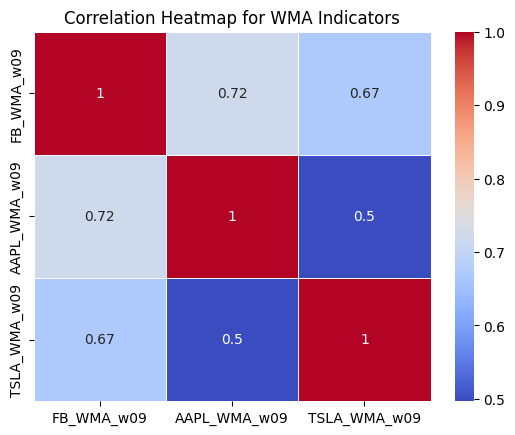

In [456]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming correlation_for_WMA is your tuple
# Extracting the first DataFrame from the tuple
correlation_matrix = correlation_for_WMA[0]

# Creating the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for WMA Indicators')
plt.show()


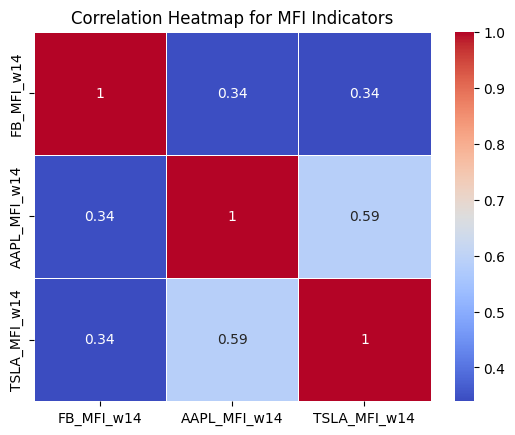

In [478]:
correlation_matrix = correlation_for_MFI[0]

# Creating the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for MFI Indicators')
plt.show()


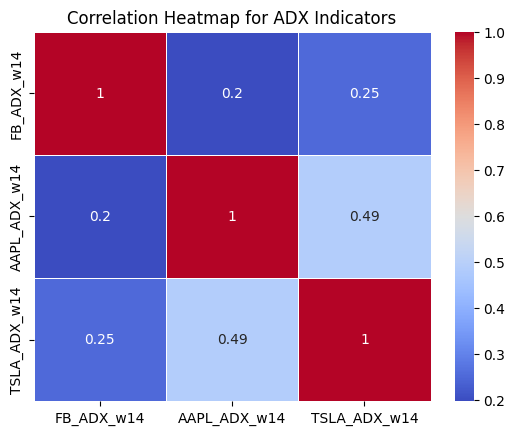

In [479]:
correlation_matrix = correlation_for_ADX[0]

# Creating the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for ADX Indicators')
plt.show()


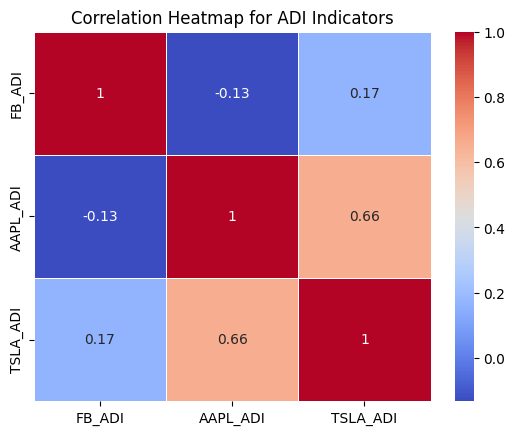

In [480]:
correlation_matrix = correlation_for_ADI[0]

# Creating the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for ADI Indicators')
plt.show()


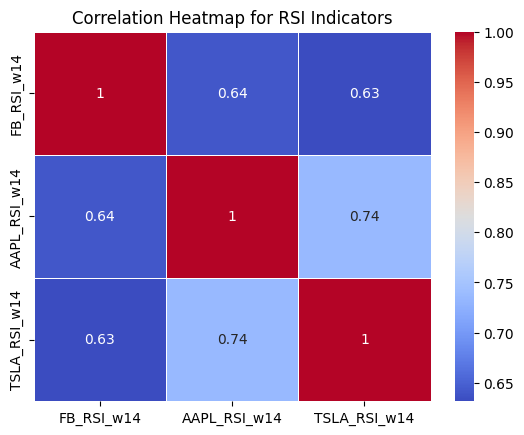

In [481]:
correlation_matrix = correlation_for_RSI[0]

# Creating the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for RSI Indicators')
plt.show()


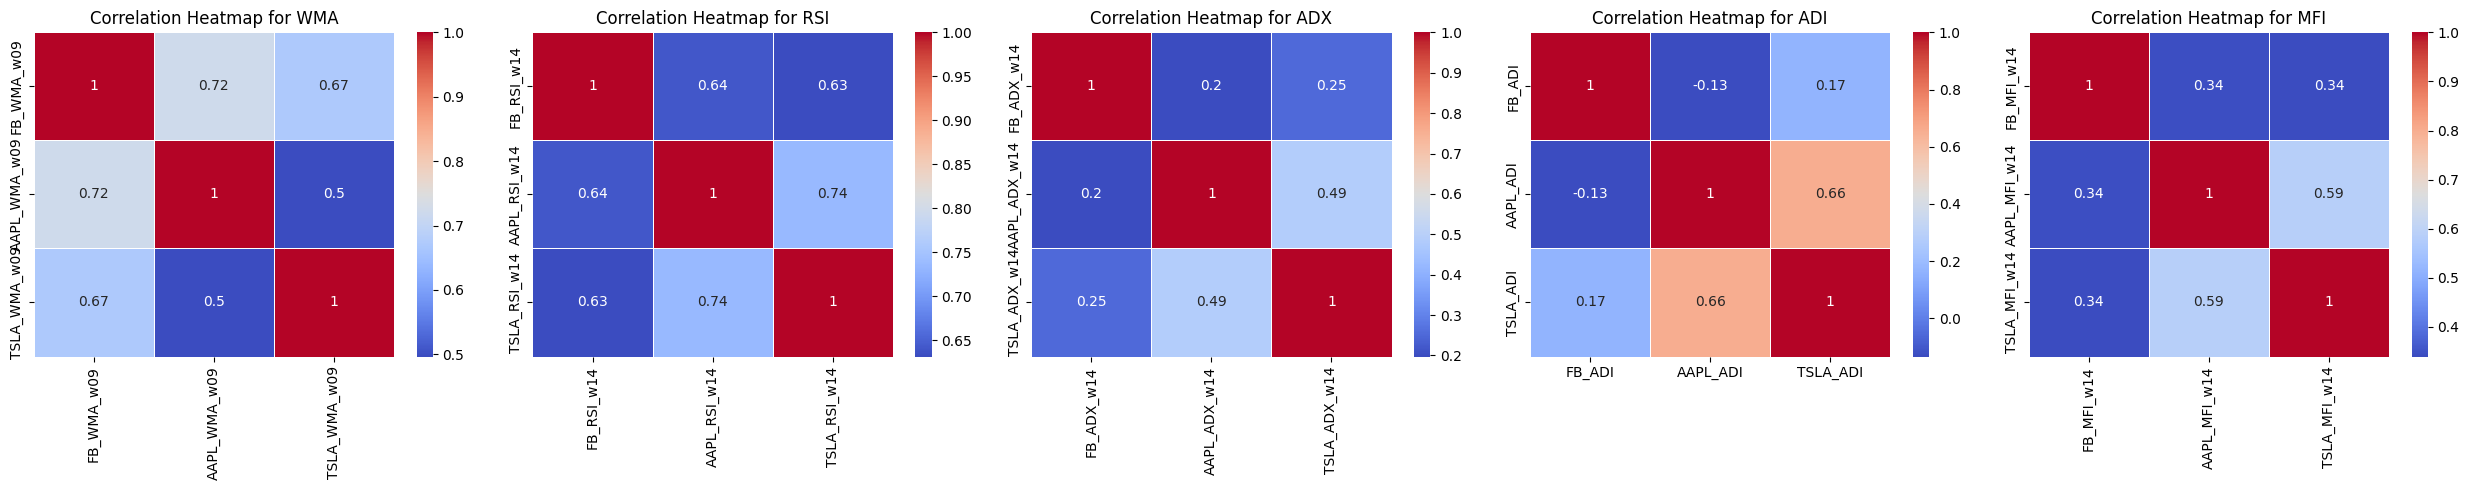

In [466]:
# Assuming you have the correlation matrices as shown above, you can plot all the heatmaps in one row like this:

fig, axs = plt.subplots(1, 5, figsize=(25, 5))  # Adjust figsize according to your needs

# WMA Indicators Heatmap
sns.heatmap(correlation_for_WMA[0], annot=True, cmap='coolwarm', linewidths=.5, ax=axs[0])
axs[0].set_title('Correlation Heatmap for WMA')

# RSI Indicators Heatmap
sns.heatmap(correlation_for_RSI[0], annot=True, cmap='coolwarm', linewidths=.5, ax=axs[1])
axs[1].set_title('Correlation Heatmap for RSI')

# ADX Indicators Heatmap
sns.heatmap(correlation_for_ADX[0], annot=True, cmap='coolwarm', linewidths=.5, ax=axs[2])
axs[2].set_title('Correlation Heatmap for ADX')

# ADI Indicators Heatmap
sns.heatmap(correlation_for_ADI[0], annot=True, cmap='coolwarm', linewidths=.5, ax=axs[3])
axs[3].set_title('Correlation Heatmap for ADI')

# MFI Indicators Heatmap
sns.heatmap(correlation_for_MFI[0], annot=True, cmap='coolwarm', linewidths=.5, ax=axs[4])
axs[4].set_title('Correlation Heatmap for MFI')

plt.tight_layout()
plt.show()


***Creating Clusters***

In [472]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt


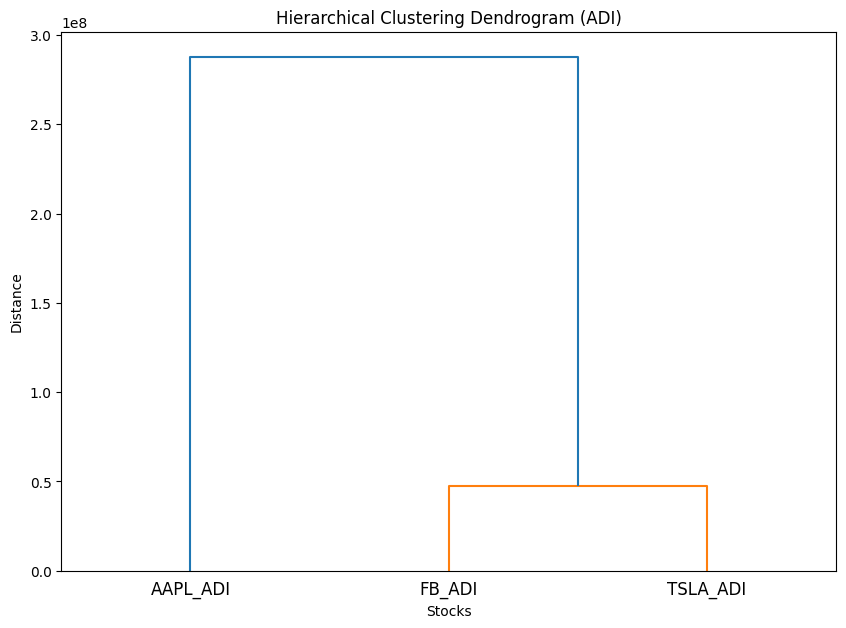

In [473]:
# Convert the full square distance matrix to a condensed format
condensed_dist_ADI = squareform(euc_dist_df_ADI, checks=False)

# Perform hierarchical clustering using the condensed distance matrix
linkage_matrix_ADI = linkage(condensed_dist_ADI, method='complete')

# Plotting the dendrogram for the ADI distance matrix
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_ADI, labels=euc_dist_df_ADI.columns)
plt.title("Hierarchical Clustering Dendrogram (ADI)")
plt.xlabel("Stocks")
plt.ylabel("Distance")
plt.show()
